In [12]:
import matplotlib.pyplot as plt
import scipy.fft as spt  
import numpy.fft as npt
import scipy.optimize as so 
import numpy as np


def invF(dt,A,xlimf='none',xlimt='none', plot='yes', output='no', absolute='yes',norm='no', positiveoutput='no'): #same as last cell but for inverse transform
    n=np.size(A)
    f=spt.fftfreq(np.size(A),d=dt)
    t=np.arange(0,np.size(A)*dt/2,dt)
    #print(f)
    #print(t)
    #print(A)
    if absolute=='no':
        if norm=='yes':
            Y0=(spt.ifft(A))/np.size(f)
        if norm=='no':
            Y0=(spt.ifft(A))
    if absolute=='yes':
        if norm=='yes':    
            Y0=abs(spt.ifft(A))/np.size(f)
        if norm=='no':
            Y0=abs(spt.ifft(A))
    Y=[]
    for i in range(len(Y0)//2):      #only plots the positive part of the time domain since negative part does not have physical meaning
        Y.append(Y0[i])

    if plot=='yes':
        plt.subplot(1,2,1)
        plt.plot(f,A,'.')
        if xlimf!='none':
            plt.xlim([-xlimf,xlimf])
        plt.xlabel('Frequency(hz)')
        plt.ylabel('Power')
        plt.title('Frequency Domain')
    
        plt.subplot(1,2,2)
        plt.plot(t,Y,'.')
        if xlimt!='none':
            plt.xlim([0,xlimt])
        plt.xlabel('Time(s)')
        plt.ylabel('Magnitude')
        plt.title('Time Domain')
    
    if output=='yes':
        if positiveoutput=='yes':
            return Y
        else:
            return Y0              #negative part of time domain is necessary for further transformation
    



<ipython-input-13-61279b3de2fe>:10: RuntimeWarning: divide by zero encountered in true_divide
  S=(1/w)**noise


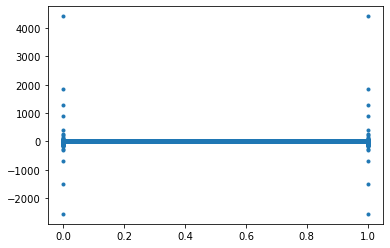

In [13]:
n=1000000
dt=0.024
noise=2
#f=np.linspace(1,10,n)
f=spt.fftfreq(n,d=dt)
#for i in f:
#    print(i)
#print(S)
w=2*np.pi*f
S=(1/w)**noise
S[0]=S[1]
re=[]
im=[]
for i in range(len(f)):
    if f[i]>=0:
        r=np.random.normal(0,1,2)
        re.append((0.5*S[i])**0.5*r[0])
#    im.append((0.5*i)**0.5*r[1])
#for i in range(len(S)//2):
#    r=np.random.normal(0,1,2)[0]
#    re.append((0.5*S[i])**0.5*r[0])

im=[]
for i in range(len(re)):
    im.append(re[-i-1])

#f=np.linspace(-10,10,2*n)    
y=np.concatenate([re,im])

d=np.linspace(0,1,len(y))
plt.plot(d,y,'.')




#print(re,im)
#print(S)
#for i in f:
#    print(i)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


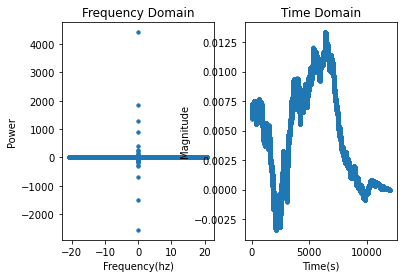

In [14]:
#n=10000
#noise=1
#f=np.linspace(0.001,1,10000)
#print(f)
#w=2*np.pi*f
#S=(1/w)**noise
#re=[]
#for i in S:
#    re.append((0.5*i)**0.5*np.random.normal(0,0.01,1)[0])
#im=[]
#for i in range(len(re)):
#    im.append(re[-i-1])

#f=np.linspace(-10,10,20)    
#y=np.concatenate([re,im])
#print(re)

#plt.plot(f,y,'.')

#print(re,im)
#print(S)
#print(re)

dt=0.024
M=invF(dt,y,output='yes',absolute='no')

F=spt.fftfreq(np.size(M),d=dt)

t=np.arange(0,np.size(M)*dt,dt)
#plt.figure()
#plt.plot(F,M)
#plt.xlim(0,20)
#plt.ylim(0,0.002)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


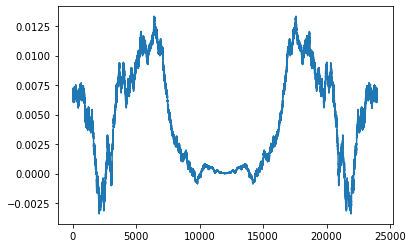

In [15]:
plt.plot(t,M)
#plt.xlim(10,100)

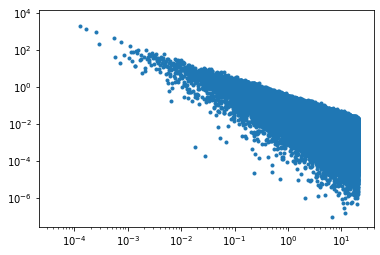

In [16]:
plt.loglog(f,y,'.')